In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy import linalg
import math
import numpy.linalg as LA

In [136]:
df = pd.read_csv('/content/drive/MyDrive/分析/CI.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [137]:
df.head()

,Leading Index,Coincident Index,Lagging Index
Date,,,
1985-01-01,76.9,79.2,81.0
1985-02-01,77.2,78.9,80.5
1985-03-01,77.1,78.8,81.2
1985-04-01,77.7,79.7,81.8
1985-05-01,77.7,79.6,81.8


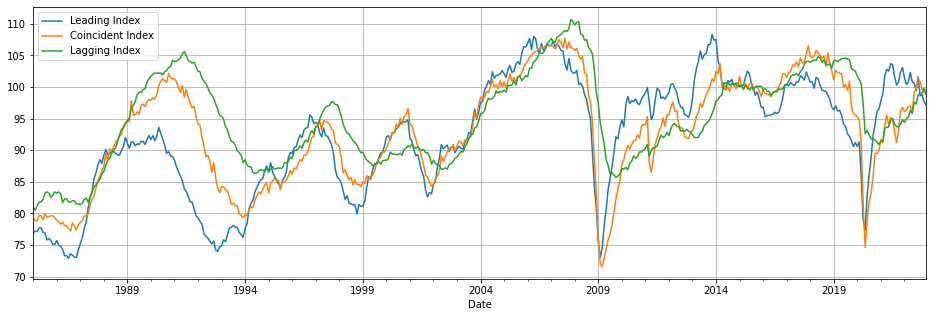

In [138]:
df.plot(figsize=(16,5))
plt.grid()
plt.show()

In [139]:
for col in df.columns:
    df[col] = np.log(df[col] / df[col].shift(1))

In [140]:
df = df.dropna()

In [141]:
def calc_corr_lag(col1, col2):
    df_tmp = df.copy()
    c_dict = {}
    for l in range(25):
        df_tmp2 = df_tmp.copy()
        df_tmp2[col1] = df_tmp2[col1].shift(l)
        df_tmp2 = df_tmp2.dropna()
        c = np.corrcoef(df_tmp2[col1],df_tmp2[col2])[0][1]
        c_dict[l] = c
    df_LC_corr = pd.DataFrame(c_dict, index=['Corr']).T
    return df_LC_corr

In [142]:
df_LC_corr = calc_corr_lag('Leading Index', 'Coincident Index')
df_LL_corr = calc_corr_lag('Leading Index', 'Lagging Index')
df_CL_corr = calc_corr_lag('Coincident Index', 'Lagging Index')

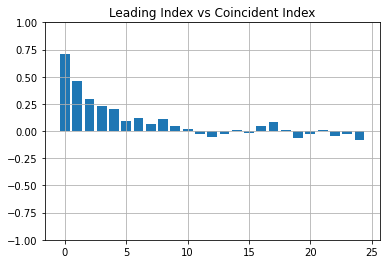

In [143]:
plt.bar(df_LC_corr.index, df_LC_corr['Corr'])
plt.ylim(-1,1)
plt.title('Leading Index vs Coincident Index')
plt.grid()
plt.show()

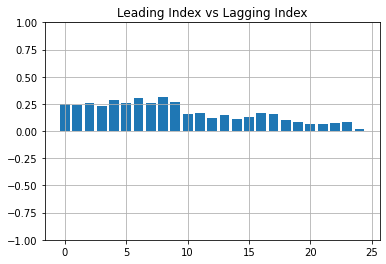

In [144]:
plt.bar(df_LL_corr.index, df_LL_corr['Corr'])
plt.ylim(-1,1)
plt.title('Leading Index vs Lagging Index')
plt.grid()
plt.show()

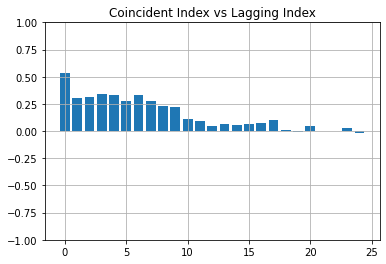

In [145]:
plt.bar(df_CL_corr.index, df_CL_corr['Corr'])
plt.ylim(-1,1)
plt.title('Coincident Index vs Lagging Index')
plt.grid()
plt.show()

In [119]:
def hermitian(arr):
    return np.conjugate(arr.T)

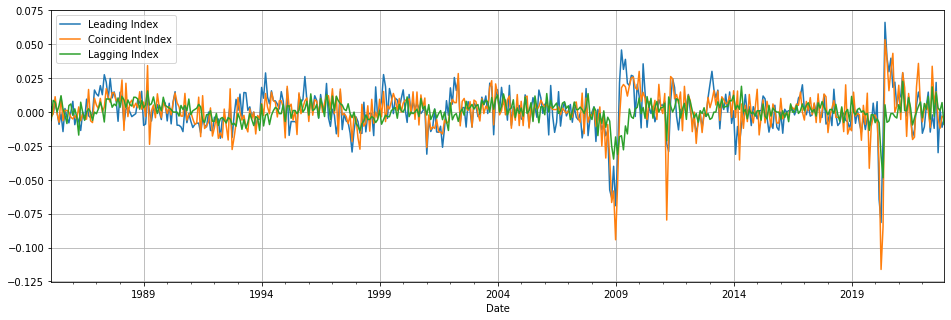

In [120]:
df.plot(figsize=(16,5))
plt.grid()
plt.show()

In [121]:
signals = []
for col in df.columns:
    s = df[col].values
    signals.append((s - np.mean(s)) / np.std(s))

In [122]:
analytic_signals = []
for s in signals:
    analytic_signals.append(hilbert(s))

In [123]:
len(df)

455

In [124]:
analytic_signals_np = np.array(analytic_signals)
analytic_signals_np_h = hermitian(analytic_signals_np)

In [125]:
corr_matrix = np.dot(analytic_signals_np, analytic_signals_np_h) * (1/len(df))

In [126]:
w, v = LA.eig(corr_matrix)

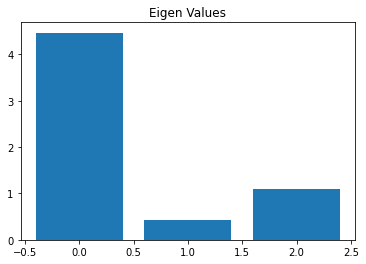

In [147]:
plt.bar(x=[i for i in range(3)], height=w.real)
plt.title('Eigen Values')
plt.show()

In [128]:
markers = ["D", ",", "o", "v", "^", "<", ">", "*", "h", "H"]
labels = []

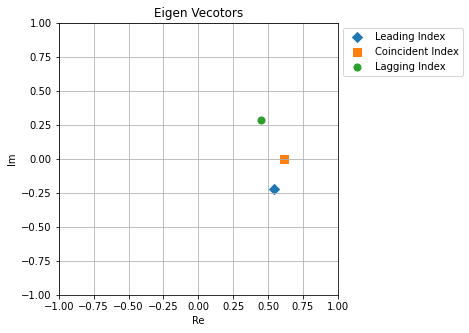

In [146]:
k = 0
fig = plt.figure(figsize=(5,5))
for i in range(3):
    plt.scatter(v.T[k].real[i], -v.T[k].imag[i], marker=markers1[i],s=50, label=df.columns[i])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Eigen Vecotors')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()